In [ ]:
import Pkg
Pkg.add("DifferentialEquations")

In [ ]:
Pkg.add("Plots")　#1度やれば良い

In [1]:
include("src/Sim.jl")

Main.Sim

In [2]:
using DifferentialEquations
using Plots
using .Sim

In [ ]:
using Pkg
Pkg.add(url="https://github.com/JuliaMBD/JuliaMBDv1.git")

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("DifferentialEquations")

In [ ]:
using JuliaMBDv1
using DifferentialEquations
using Plots

In [3]:
#出来ている

In [4]:
#@blk ConstantブロックはIntegratorBlock()の入力ポートが一つになるように削除した
#d_Fr_chair,k_Fr_chair,z_k_Fr_chair_iniの初期値は指定されていなかったので自分で定めた
@model St_f_pnt begin
    
    @parameter d_Fr_chair #Gainブロック
    @parameter k_Fr_chair #Gain1ブロック
    @parameter z_k_Fr_chair_ini #Constantブロック
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 
    #@blk Constant = ConstantBlock(z_k_Fr_chair_ini)
    #@blk Integrator1 = IntegratorBlock() inport[1]:add inport[2]:cons
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_chair_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_chair)
    @blk Gain1 = GainBlock(k_Fr_chair)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

St_f_pnt (generic function with 1 method)

In [5]:
@model TestSt_f_pnt begin
    @parameter d_Fr_chair k_Fr_chair z_k_Fr_chair_ini
    ##@blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:in1
    
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk St_f = St_f_pnt(d_Fr_chair=d_Fr_chair, k_Fr_chair=k_Fr_chair, z_k_Fr_chair_ini=z_k_Fr_chair_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    @connect inin1 => r
    @connect inin2 => y

end

TestSt_f_pnt (generic function with 1 method)

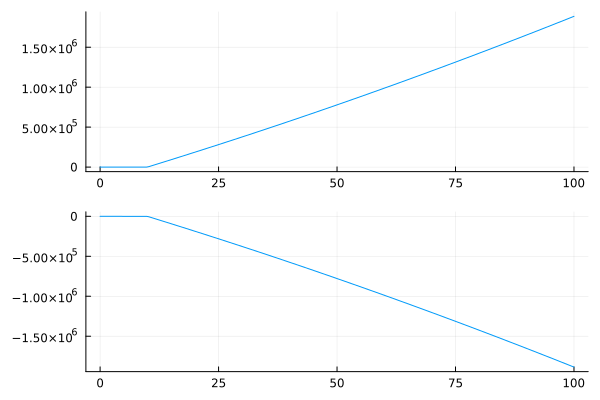

In [6]:
#初期値が未定義
m = TestSt_f_pnt(d_Fr_chair=1825.3, k_Fr_chair=6, z_k_Fr_chair_ini=0.00036769);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph